In [1]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

import tweepy
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
consumer_key = "DJOXCCYfFWSoWwlnx8UgQpAOP"
consumer_secret = "Vr4mZffVl4e7oi2u2B9aXuNtfafSPzTZVZ9yybjmyOuu1SVl35"
access_token = "1031762329505939456-9boU68QlZs1cRU0irOBxzkAGbIvNiz"
access_token_secret = "5T4Kq2JwWCb6obxWE67qvPTY0myT0IJBWgQhnT5g9m3kU"


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
target_user = ['@BBCNews','@CBSNews','@CNN','@FoxNews','@NYT']

In [4]:
df = pd.DataFrame({"@BBCNews":'',
                   "@CBSNews":'',
                   "@CNN":'',
                   "@FoxNews":'',
                   "@NYT":''}, index=[0])
df.head()

,@BBCNews,@CBSNews,@CNN,@FoxNews,@NYT
0,,,,,


In [7]:
# Loop through each user
for user in target_user:
    counter = 0
    # Loop through 100 tweets
    for status in tweepy.Cursor(api.user_timeline, id=user).items(100):
        # Extract text
        text = status.text
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(text)["compound"]
        
        # Add each value to the dataframe
        df.set_value(counter, user, compound)
        # Increment counter
        counter = counter + 1

/Users/kristenbroersma/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if sys.path[0] == '':


TweepError: Twitter error response: status code = 401

In [8]:
df.head()

,@BBCNews,@CBSNews,@CNN,@FoxNews,@NYT
0,0,-0.3182,0.6124,0.6249,
1,0,0.886,0,0.9153,NaN
2,0,0.8271,0.8271,-0.5267,NaN
3,0.6249,0.6124,0.9337,0.6249,NaN
4,-0.6249,0.765,0.8442,-0.1119,NaN


TypeError: nan is not a string

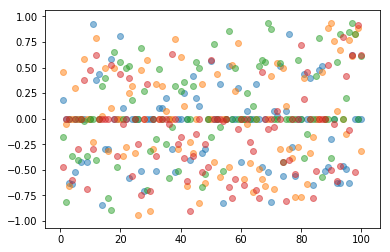

In [9]:
x = np.arange(100, 0, -1)
a = plt.scatter(x, df['@BBCNews'], alpha=0.5)
b = plt.scatter(x, df['@CBSNews'], alpha=0.5)
c = plt.scatter(x, df['@CNN'], alpha=0.5)
d = plt.scatter(x, df['@FoxNews'], alpha=0.5)
e = plt.scatter(x, df['@NYT'], alpha=0.5)
plt.title('Sentiment Analysis of Tweets (1/14/2017)')
plt.xlabel('Number of Tweets Ago')
plt.ylabel('Compound Sentiment Score')
plt.gca().invert_xaxis()
plt.legend((a,b,c,d,e),('@BBCNews', '@CBSNews','@CNN', '@FoxNews', '@nytimes'),numpoints=1, loc='upper right', ncol=1, fontsize=8)
lgd = plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('Sentiment_scatter_plot.png', bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [10]:
#find average of each news channel

df_mean = df.mean()

df_mean.head()

@BBCNews   -0.064194
@CBSNews    0.008563
@CNN        0.087226
@FoxNews   -0.100203
dtype: float64

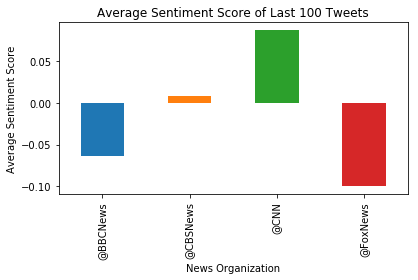

In [11]:
df_mean.plot(kind='bar')
plt.title('Average Sentiment Score of Last 100 Tweets')
plt.xlabel('News Organization')
plt.ylabel('Average Sentiment Score')
plt.savefig('Sentiment_Avg.png')
plt.tight_layout()
plt.show()